In [61]:
# This will force external files to be reloaded
%load_ext autoreload
%autoreload 2
import utils.rootprint
import utils.rootnotes
from array import array

from utils.plotting import *

from ROOT import TFile, TH1F, TCanvas, TLegend, TGraphErrors, gDirectory
import math
from itertools import chain
gStyle.SetOptStat(000000)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [231]:
base_dir = "/Users/demattia/RemoteProjects/LinearizedTrackFit/LinearizedTrackFit/python/ConstantsProduction/"

# fit_type = "PreEstimate_Longitudinal_Rz_tgTheta/"
# fit_type = "FourteenRegions/FlatPt/PreEstimate_Longitudinal_Rz/"
# fit_type = "FourteenRegions/FlatPt/PreEstimate_Longitudinal_Rz_10_more/"
# fit_type = "FourteenRegions/FlatPt/PreEstimate_Longitudinal_Rz_10_more/Test/"
# fit_type = "FourteenRegions/FlatOneOverPt/PreEstimate_Longitudinal_Rz/"

# fit_type = "NineRegions/FlatOneOverPt/PreEstimate_Transverse_10_more/Test/"
fit_type = "NineRegions/FlatOneOverPt/PreEstimate_Longitudinal_Rz/"
# fit_type = "NineRegions/FlatOneOverPt/PreEstimate_Longitudinal_Rz/Test/"
# fit_type = "NineRegions/FlatOneOverPt/PreEstimate_Longitudinal_Rz/TestFlatPt/"
# fit_type = "NineRegions/FlatOneOverPt/PreEstimate_Longitudinal_Rz_10_more/Test/"
# fit_type = "NineRegions/FlatPt/PreEstimate_Longitudinal_Rz/TestFlatOneOverPt/"

# input_file_name = base_dir+fit_type+"linearFitterHistograms.root"

file_name_list, legend_entry_list = generate_files_and_legend_entry_all_regions_6_6(base_dir, fit_type)


region = 2


input_file_name = file_name_list[region-1]
input_file_name = base_dir+fit_type+"linearFitterHistograms.root"


print input_file_name

/Users/demattia/RemoteProjects/LinearizedTrackFit/LinearizedTrackFit/python/ConstantsProduction/NineRegions/FlatOneOverPt/PreEstimate_Longitudinal_Rz/linearFitterHistograms.root


## Pt Bias and Resolution

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c1
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c2
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: Resolutions


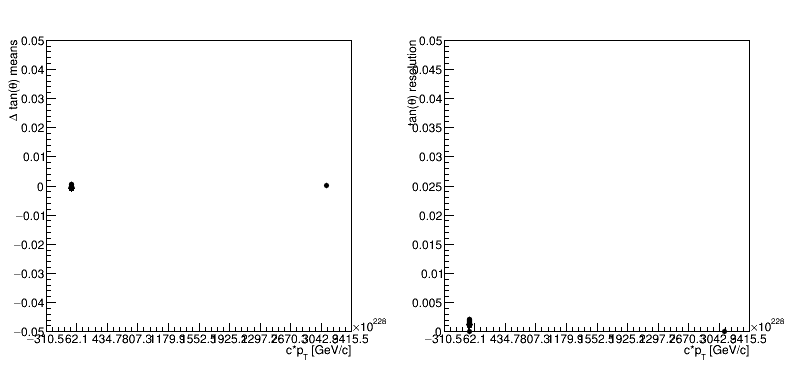

In [232]:
total_bins = 400
pt_bin_edge = []
min_x = -0.05
max_x = 0.05
# pt_min = -10.
# pt_max = 10.
# pt_bin_edge = [n for n in chain(range(-10, -1), range(2, 11))]

# Full pt range
pt_min = -200.
pt_max = 200.
# pt_bin_edge = [n for n in chain(range(-200, -1), range(2, 201))]
pt_bin_edge = [10*n for n in chain(range(-20, -2), range(2, 21))]+[n for n in chain(range(-20, -1), range(2, 21))]

o = fit_slices(input_file_name, "deltaTgThetaVsPt", pt_bin_edge, pt_min, pt_max, total_bins, min_x, max_x, 0., 0.05,
               "c*p_{T} [GeV/c]", "#Delta tan(#theta)", "tan(#theta) resolution")
o[2]

In [233]:
def draw_resolution(input_file_name, h_name, x_name, y_name, y_max=0.05, rebin=1):
    input_file = TFile(input_file_name, "READ")
    c = TCanvas("c", "c", 800, 800)
    c.Divide(2, 2)
    h = input_file.FindObjectAny(h_name)
    if rebin != 1:
        h.RebinX(rebin)
    h.FitSlicesY()
    
    c.cd(1)
    h.Draw("COLZ")
    h.GetXaxis().SetTitle(x_name)
    h.GetXaxis().SetTitleOffset(1.2)
    h.GetYaxis().SetTitle("#Delta("+y_name+")")
    h.GetYaxis().SetTitleOffset(1.8)
    h.SetTitle("")

    c.cd(3)
    h_mean = gDirectory.Get(h_name+"_1")
    h_mean.Draw()
    h_mean.GetXaxis().SetTitle(x_name)
    h_mean.GetXaxis().SetTitleOffset(1.2)
    h_mean.GetYaxis().SetTitle("#Delta("+y_name+") mean")
    h_mean.GetYaxis().SetTitleOffset(1.8)
    h_mean.SetTitle("")

    c.cd(4)
    h_sigma = gDirectory.Get(h_name+"_2")
    h_sigma.Draw()
    h_sigma.GetXaxis().SetTitle(x_name)
    h_sigma.GetXaxis().SetTitleOffset(1.2)
    h_sigma.GetYaxis().SetRangeUser(0., y_max)
    h_sigma.GetYaxis().SetTitle("#sigma("+y_name+")")
    h_sigma.GetYaxis().SetTitleOffset(1.8)
    h_sigma.SetTitle("")
    c_sigma = TCanvas("c_sigma", "c_sigma", 600, 600)
    h_sigma.Draw()
    
    return c, c_sigma, h, h_mean, h_sigma, input_file

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c_sigma


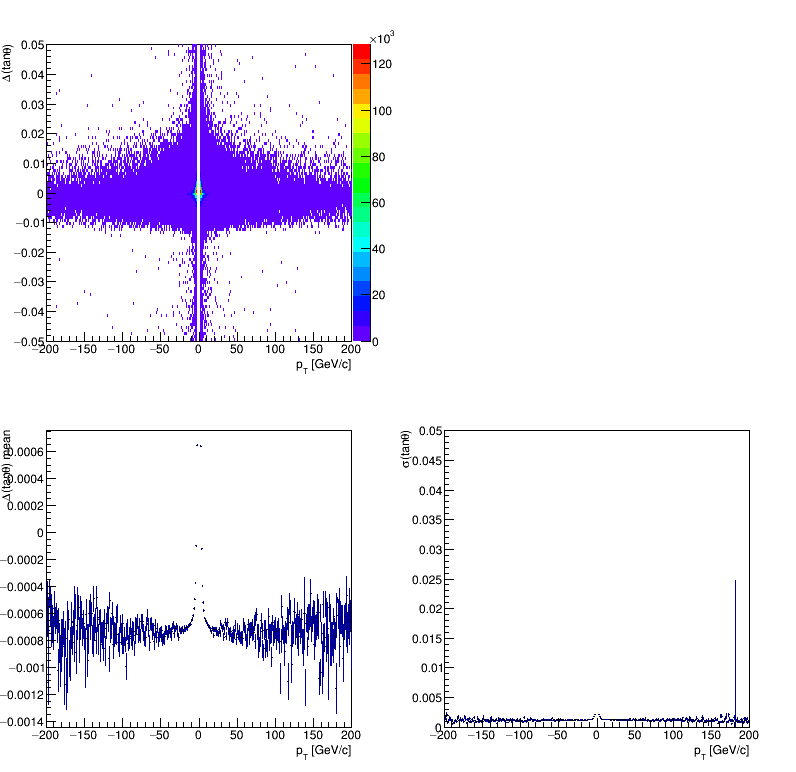

In [234]:
c = draw_resolution(input_file_name, "deltaTgThetaVsPt", "p_{T} [GeV/c]", "tan#theta", rebin=1)
c[0]

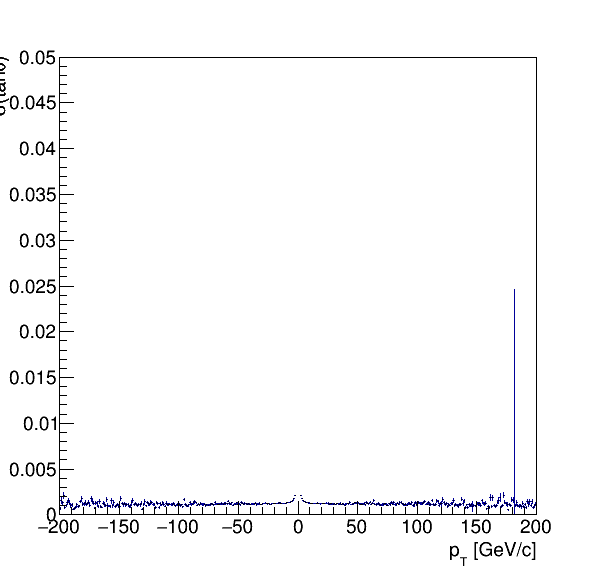

In [235]:
c[1]

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c_sigma


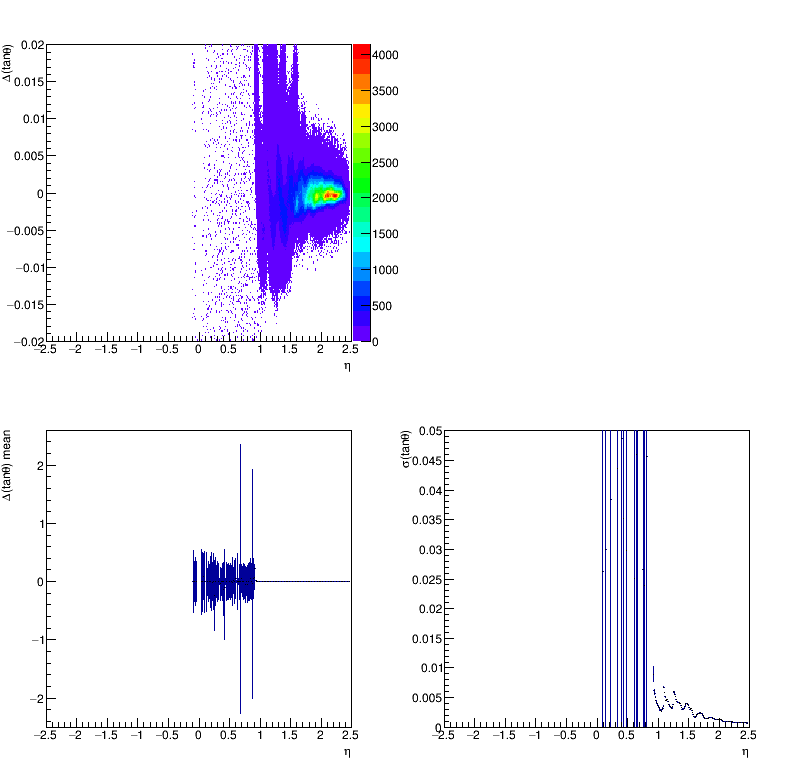

In [236]:
c = draw_resolution(input_file_name, "deltaTgThetaVsEta", "#eta", "tan#theta", rebin=1)
c[0]

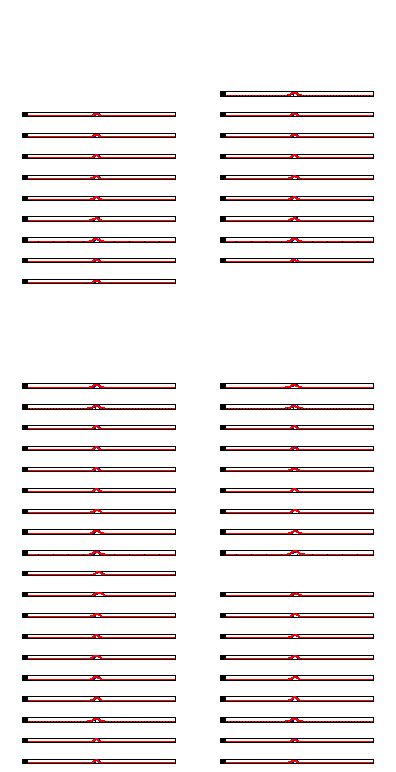

In [186]:
o[1]

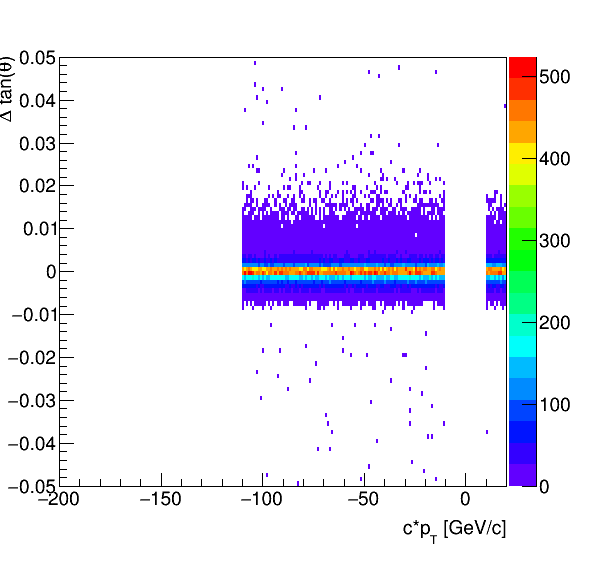

In [162]:
o[0]

In [135]:
c = TCanvas("c", "c", 600, 600)
o[3].Draw("APE")
o[3].Fit("pol1")
func = o[3].GetFunction("pol1");
func.Draw("same")
p0 = func.GetParameter(0);
p1 = func.GetParameter(1);
c
# print p0
# print p1
c.SaveAs("fit.root")

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


## 1/Pt Bias and Resolution

## $\chi^2/ndof$

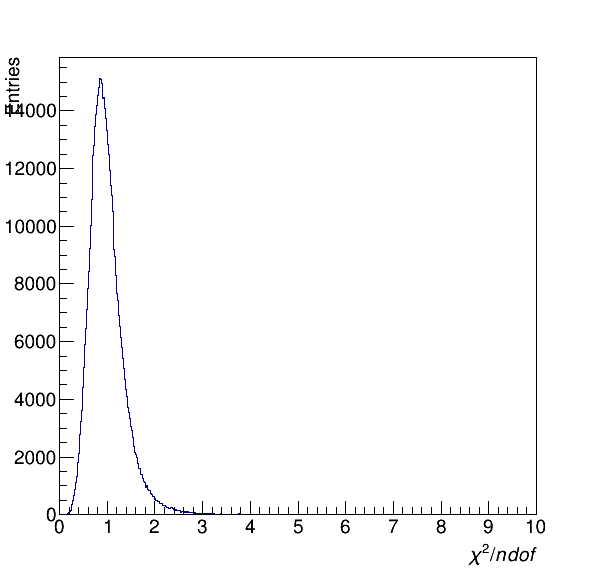

In [136]:
c_chi2Ndof = draw_chi2ndof(input_file_name)
c_chi2Ndof[0]

##Z Bias and Resolution

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c1
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c2
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: Resolutions


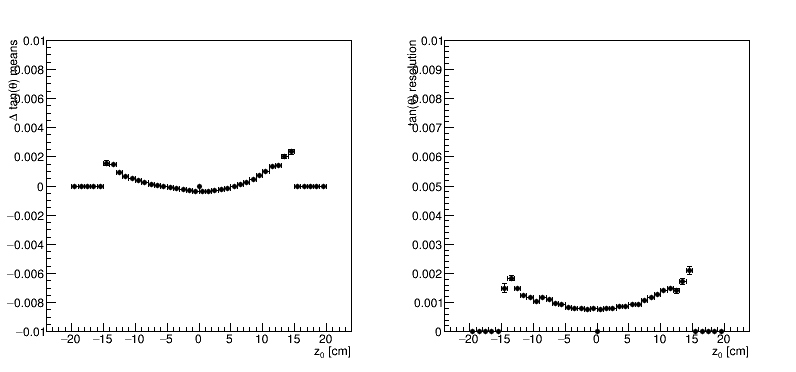

In [137]:
z0_min = -20.
z0_max = 20.
total_bins_z0 = 400
min_x_z0 = -0.01
max_x_z0 = 0.01
z0_bin_edge = [n for n in range(int(z0_min), int(z0_max)+1)]

o_z0 = fit_slices(input_file_name, "deltaTgThetaVsZ0", z0_bin_edge, z0_min, z0_max, total_bins_z0,
                  min_x_z0, max_x_z0, 0., 0.01,
                  # min_x_z0, max_x_z0, 0., 10.,
                  "z_{0} [cm]", "#Delta tan(#theta)", "tan(#theta) resolution")

o_z0[2]

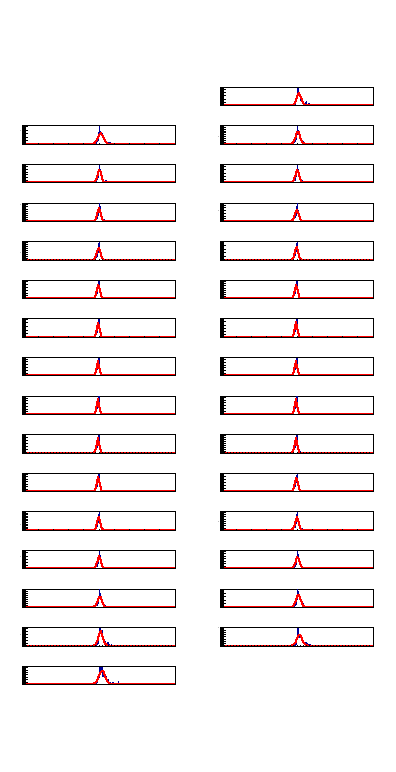

In [138]:
o_z0[1]

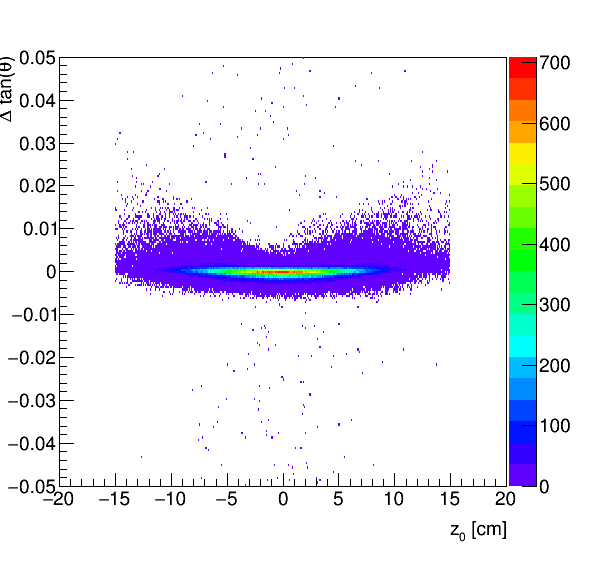

In [139]:
o_z0[0]

##$cot\theta$ bias and resolution

In [140]:
total_bins_eta = 500
min_x_eta = -0.01
max_x_eta = 0.02
eta_bin_edge = [n/50. for n in range(1, int(eta_max*50)+1)]

o_cotTheta = fit_slices(input_file_name, "deltaTgThetaVsEta", eta_bin_edge,
                        eta_min, eta_max, total_bins_eta, min_x_eta, max_x_eta, 0., 0.006,
                        "#eta", "#Delta tan#theta", "tan#theta resolution")

o_cotTheta[2]

NameError: name 'eta_max' is not defined

In [141]:
o_cotTheta[0]

NameError: name 'o_cotTheta' is not defined